In [1]:
def outliers(df, ft):    
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
            
    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 + 1.5 *IQR
            
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls


In [2]:

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import os

# List of folders containing CSV files to clean
folders = ['Intention', 'Operation']

# Loop over each folder and CSV file, and clean the data
for folder in folders:
    for file in os.listdir(folder):
        if file.endswith('.csv'):
            # Read the CSV file into a pandas dataframe
            file_path = os.path.join(folder, file)
            df = pd.read_csv(file_path)
            df.shape
            df.describe()

            # Remove null values from both columns
            df = df.dropna(subset=['Before', 'After'],how='all')
            df['Before'] = df['Before'].fillna(value=0)
            df['After'] = df['After'].fillna(value=0)

            index_list = []
            for column in ['Before', 'After']:
                index_list.extend(outliers(df,column))
            
            df_cleaned = remove(df,index_list)
            # Add '0' to cells that contain numbers in one column but not the other
            df_cleaned['Before'] = pd.to_numeric(df_cleaned['Before'], errors='coerce')
            df_cleaned['After'] = pd.to_numeric(df_cleaned['After'], errors='coerce')
            df_cleaned['Before'] = df_cleaned['Before'].fillna(0)
            df_cleaned['After'] = df_cleaned['After'].fillna(0)

            # Ensure that both columns have equal data points
            min_len = min(len(df_cleaned['Before']), len(df_cleaned['After']))
            df_cleaned = df_cleaned.iloc[:min_len, :]

            # Save the cleaned data to a new CSV file
            cleaned_file_path = os.path.join(folder, 'cleaned_' + file)
            df_cleaned.to_csv(cleaned_file_path, index=False)


In [4]:

import matplotlib.pyplot as plt

def create_boxplot(datafile):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(datafile)

    # Select the two columns of data to use for the box plot
    data1 = df['Before']
    data2 = df['After']

    # Create a list of the two columns of data
    data = [data1, data2]

    # Create the box plot using matplotlib
    plt.boxplot(data)

    # Set the x-axis labels
    plt.xticks([1, 2], ['Before', 'After'])

    # Show the plot
    plt.show()


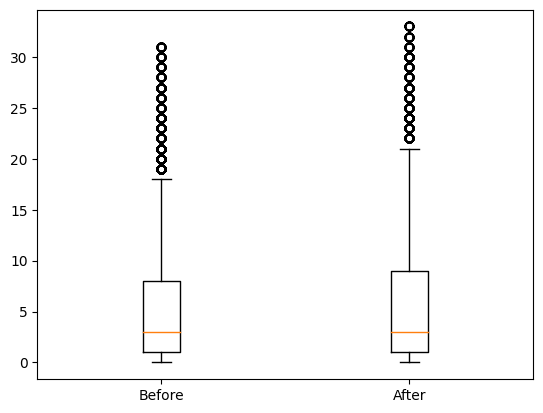

In [5]:
#Intention WMC
create_boxplot('/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Intention/cleaned_WMC.csv')

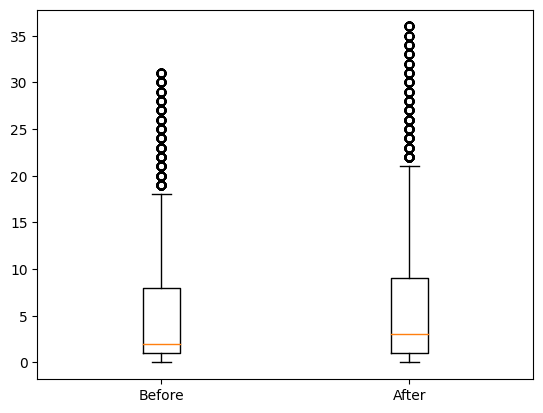

In [6]:
#Operation WMC
create_boxplot('/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Operation/cleaned_WMC.csv')

In [7]:
#Mean Before , After and P-Value Calcualtion

import pandas as pd
from scipy.stats import ttest_rel

# List of metric names
metrics = ['LOC', 'CBO', 'NOC', 'DIT', 'RFC', 'LCOM', 'WMC']

# Empty lists to store means and p-values for each metric
means_before = []
means_after = []
p_values = []

means_before_op = []
means_after_op = []
p_values_op = []

# Loop over each metric
for metric in metrics:
    # Load CSV file for current metric
    df = pd.read_csv(f'/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Intention/cleaned_{metric}.csv')
    df_op = pd.read_csv(f'/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Operation/cleaned_{metric}.csv')

    # Calculate mean for "before" and "after" columns
    mean_before = df['Before'].mean()
    mean_after = df['After'].mean()
    
    mean_before_op = df_op['Before'].mean()
    mean_after_op = df_op['After'].mean()
    
    
    # Calculate p-value using a two-sided t-test
    _, p_value = ttest_rel(df['Before'], df['After'])
    _, p_value_op = ttest_rel(df_op['Before'], df_op['After'])
    
    # Append means and p-value to their respective lists
    means_before.append(mean_before)
    means_after.append(mean_after)
    p_values.append(p_value)
    
    means_before_op.append(mean_before_op)
    means_after_op.append(mean_after_op)
    p_values_op.append(p_value_op)
    

# Create a new dataframe with the results
results_df = pd.DataFrame({'Metric': metrics, 'Mean Before': means_before, 'Mean After': means_after, 'P-value': p_values})

results_df_op = pd.DataFrame({'Metric': metrics, 'Mean Before': means_before_op, 'Mean After': means_after_op, 'P-value': p_values_op})

# Format p-values as floating-point numbers with 4 decimal places
results_df['P-value'] = results_df['P-value'].apply(lambda x: f'{x:.8f}')
results_df_op['P-value'] = results_df_op['P-value'].apply(lambda x: f'{x:.8f}')

# Print the results dataframe
print("Intention")
print(results_df)
print("\nOperation")
print(results_df_op)


Intention
  Metric  Mean Before  Mean After     P-value
0    LOC    35.570416   37.738974  0.00000000
1    CBO     7.093832    7.359034  0.00000001
2    NOC     0.000000    0.000000         nan
3    DIT     1.318812    1.365363  0.00000000
4    RFC    16.041093   16.738879  0.00000000
5   LCOM    21.473018   22.202628  0.00023301
6    WMC     5.881483    6.304816  0.00000000

Operation
  Metric  Mean Before  Mean After     P-value
0    LOC    32.123009   37.783237  0.00000000
1    CBO     5.890963    6.589365  0.00000000
2    NOC     0.000000    0.000000         nan
3    DIT     1.433765    1.571486  0.00000000
4    RFC     5.268047    5.801231  0.00000000
5   LCOM    21.596548   23.803802  0.00000000
6    WMC     5.615570    6.754396  0.00000000


In [8]:
df.shape

(19415, 2)